In [457]:
import pandas as pd
import re
from math import nan
import numpy as np

In [458]:
housing_data = pd.read_json('data.json')

In [455]:
checking.head()

,area,house_price,amenities,floors,bedrooms,bathrooms,property_type,selling_type,road_size,road_type,location_two
0,19.0,7.500000e+04,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",2.5,2.5,2.5,HOUSE,RENT,14.0,Soil Stabilized,Lalitpur Metropolitan City
1,5.0,4.175269e+07,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",2.5,2.5,2.5,HOUSE,SALE,14.0,Black Topped,Budhanilkantha Municipality
2,4.0,2.900000e+07,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",3.0,2.5,2.5,HOUSE,SALE,10.0,Gravelled,Budhanilkantha Municipality
3,3.0,1.750000e+07,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",2.5,2.5,2.5,HOUSE,SALE,8.0,Soil Stabilized,Chandragiri Municipality
4,3.0,1.700000e+07,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",3.0,4.0,2.5,HOUSE,SALE,10.0,Gravelled,Tokha Municipality


In [456]:
type(checking['amenities'][0])

str

In [459]:
housing_data.head()

,area,house_price,title,house_location,amenities,property_face,ownership_category,road_access,floors,parking,bedrooms,bathrooms,builtuparea
0,1-3-0-0 Ropani-Aana-Paisa-Daam,"Rs. 75,000","Beautiful house on rent in Bagdol, Nakkhu","Bagdol, Lalitpur Metropolitan City","[Electricity Backup, Drainage, Parking, Drinki...",East,Individual,14Feet /Soil Stabilized,2.5 Stories,NaN,NaN,NaN,NaN
1,0-5-0-0 Ropani-Aana-Paisa-Daam,Price On Call,"Brand new house on sale in Mandikhatar, Kathmandu","Mandikhatar, Budhanilkantha Municipality","[Drainage, Electricity Backup, Drinking Water,...",NaN,Individual,14Feet /Black Topped,NaN,2 car and some bikes,NaN,NaN,NaN
2,0-4-0-0 Ropani-Aana-Paisa-Daam,"Rs. 2,90,00,000","Resudential house on sale in Paiyatar, Kapan","Paiyuntar, Budhanilkantha Municipality","[Drinking Water, Bathroom, Electricity Backup,...",South-East,Individual,10Feet /Gravelled,3 Stories,NaN,NaN,NaN,NaN
3,0-3-0-0 Ropani-Aana-Paisa-Daam,"Rs. 1,75,00,000","Beautiful house on sale in Checkpost, Chandragiri","Chandragiri, Chandragiri Municipality","[Electricity Backup, Drainage, Bathroom, Drink...",NaN,Individual,8-10Feet /Soil Stabilized,2.5 Stories,NaN,NaN,NaN,NaN
4,0-3-0-0 Ropani-Aana-Paisa-Daam,"Rs. 1,70,00,000","Beautiful house on sale in Bhatkekopul, Tokha","Tokha, Tokha Municipality","[Washing Machine, Bathroom, Drinking Water, El...",West,Individual,10Feet /Gravelled,3 Stories,NaN,4,NaN,NaN


In [460]:
def conversion_to_aana(measurement :str) -> float:
    try:
        if measurement.find("Ropani") > -1:
            data = measurement.split('-')
            aana = 16 * float(data[0]) + float(data[1]) + 0.25 * float(data[2]) + 0.0625 * float(data[3][0])
            return aana
        elif measurement.find("Bigha") > -1:
            data = measurement.split('-')
            aana = 213.0021914 * float(data[0]) + 10.65010957 * float(data[1]) + 0.5322505478 * float(data[2]) + 0.006368 * float(data[3][0])
            return aana
        else :
            return nan
            print("ERROR: conversoin_to_aana func")
    except ValueError:
        return nan

In [461]:
def housing_price_filter(price :str) -> float:
    try:
        return float(''.join(price[4:].split(',')))
    except ValueError:
        return nan

In [462]:
def extract_sale_type(x) -> list:
    try:
        if type(x) != str:
            return nan
        elif x.find("sale") > -1 or x.find("Sale") > -1:
            return "SALE"
        elif x.find("rent") > -1 or x.find("Rent") > -1:
            return "RENT"
        else :
            return nan
    except ValueError:
        return nan

In [463]:
def extract_building_type(x) -> str:
    try:
        if type(x) != str:
            return nan
        elif x.find("house") > -1 or x.find("House") > -1 or x.find("home") > -1 or x.find("Home") > -1 or x.find("Mansion") > -1 or x.find("mansion") > -1 or x.find("villa") > -1 or x.find("Villa") > -1 or x.find("Bunglow") > -1 or x.find("bunglow") > -1 or x.find("Bungalow") > -1 or x.find("bungalow") > -1:
            return "HOUSE"
        elif x.find("flat") > -1 or x.find("Flat") > -1 or x.find("apartment") > -1 or x.find("Apartment") > -1:
            return "FLAT"
        elif x.find("ommercial") > -1:
            return "COMM_BUILD"
        else:
            return nan
    except ValueError:
        return nan

In [464]:
def location_one(loc: str):
    if type(loc) != str:
        return nan
    try:
        return loc.split(',')[0]
    except ValueError:
        return nan

In [465]:
def location_two(loc: str):
    if type(loc) != str:
        return nan
    try:
        return loc.split(',')[1]
    except ValueError:
        return nan

In [466]:
def road_size(size: str):
    if type(size) != str:
        return nan
    try:
        data = size.split('/')[0]
        data = data.split('-')[0]
        num = [str(x) for x in data if x.isdigit()]
        num = ''.join(num)
        return float(num)
    except ValueError:
        return nan

In [467]:
def road_type(road: str):
    if type(road) != str:
        return nan
    try:
        return road.split('/')[1]
    except IndexError:
        return nan

In [468]:
def filter_floors(floor: str):
    if type(floor) != str:
        return nan
    try:
        floor = floor.split(' ')[0]
        return float(floor)
    except ValueError:
        return nan

In [469]:
def filter_bed_bath(data):
    if type(data) != str:
        return nan
    try:
        return float(data)
    except ValueError:
        return nan

In [470]:
test_housing_data = housing_data

In [471]:
test_housing_data["bathrooms"] = test_housing_data["bathrooms"].apply(filter_bed_bath)

In [472]:
test_housing_data["bedrooms"] = test_housing_data["bedrooms"].apply(filter_bed_bath)

In [473]:
test_housing_data["area"] = test_housing_data["area"].apply(conversion_to_aana)

In [474]:
test_housing_data["house_price"] = test_housing_data["house_price"].apply(housing_price_filter)

In [475]:
test_housing_data["property_type"] = test_housing_data["title"].apply(extract_building_type)

In [476]:
test_housing_data["selling_type"] = test_housing_data["title"].apply(extract_sale_type)

In [477]:
test_housing_data["road_size"] = test_housing_data["road_access"].apply(road_size)

In [478]:
test_housing_data["road_type"] = test_housing_data["road_access"].apply(road_type)

In [479]:
test_housing_data["location_one"] = test_housing_data["house_location"].apply(location_one)

In [480]:
test_housing_data["location_two"] = test_housing_data["house_location"].apply(location_two)

In [481]:
test_housing_data["floors"] = test_housing_data["floors"].apply(filter_floors)

In [482]:
test_housing_data.head()

,area,house_price,title,house_location,amenities,property_face,ownership_category,road_access,floors,parking,bedrooms,bathrooms,builtuparea,property_type,selling_type,road_size,road_type,location_one,location_two
0,19.0,75000.0,"Beautiful house on rent in Bagdol, Nakkhu","Bagdol, Lalitpur Metropolitan City","[Electricity Backup, Drainage, Parking, Drinki...",East,Individual,14Feet /Soil Stabilized,2.5,NaN,NaN,NaN,NaN,HOUSE,RENT,14.0,Soil Stabilized,Bagdol,Lalitpur Metropolitan City
1,5.0,NaN,"Brand new house on sale in Mandikhatar, Kathmandu","Mandikhatar, Budhanilkantha Municipality","[Drainage, Electricity Backup, Drinking Water,...",NaN,Individual,14Feet /Black Topped,NaN,2 car and some bikes,NaN,NaN,NaN,HOUSE,SALE,14.0,Black Topped,Mandikhatar,Budhanilkantha Municipality
2,4.0,29000000.0,"Resudential house on sale in Paiyatar, Kapan","Paiyuntar, Budhanilkantha Municipality","[Drinking Water, Bathroom, Electricity Backup,...",South-East,Individual,10Feet /Gravelled,3.0,NaN,NaN,NaN,NaN,HOUSE,SALE,10.0,Gravelled,Paiyuntar,Budhanilkantha Municipality
3,3.0,17500000.0,"Beautiful house on sale in Checkpost, Chandragiri","Chandragiri, Chandragiri Municipality","[Electricity Backup, Drainage, Bathroom, Drink...",NaN,Individual,8-10Feet /Soil Stabilized,2.5,NaN,NaN,NaN,NaN,HOUSE,SALE,8.0,Soil Stabilized,Chandragiri,Chandragiri Municipality
4,3.0,17000000.0,"Beautiful house on sale in Bhatkekopul, Tokha","Tokha, Tokha Municipality","[Washing Machine, Bathroom, Drinking Water, El...",West,Individual,10Feet /Gravelled,3.0,NaN,4.0,NaN,NaN,HOUSE,SALE,10.0,Gravelled,Tokha,Tokha Municipality


In [433]:
unique_amenities = []
for x in test_housing_data["amenities"]:
    unique_amenities = list(set(unique_amenities + x))

In [434]:
def amenities_process(x):
    a = []
    for data in unique_amenities:
        if data in x:
            a.append(1)
        else :
            a.append(0)
    assert(len(a) == 27)
    return a

In [437]:
type(amenities_process(test_housing_data['amenities'][0]))

list

In [438]:
test_housing_data["amenities"] = test_housing_data["amenities"].apply(amenities_process)

In [439]:
type(test_housing_data['amenities'][0])

list

In [483]:
new_df = test_housing_data.groupby('selling_type').mean()

rent_price = new_df['house_price'][0]
sale_price = new_df['house_price'][1]

i = 0
for x, y in zip(test_housing_data['house_price'], test_housing_data['selling_type']):
    if np.isnan(x):
        if y == "RENT":
            test_housing_data['house_price'][i] = rent_price
        elif y == "SALE":
            test_housing_data['house_price'][i] = sale_price
        else :
            print("error innerloop")
    i = i + 1

C:\Users\ACHYUT~1\AppData\Local\Temp/ipykernel_5444/753291834.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_housing_data['house_price'][i] = sale_price
C:\Users\ACHYUT~1\AppData\Local\Temp/ipykernel_5444/753291834.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_housing_data['house_price'][i] = rent_price


In [484]:
test_housing_data.drop("title", axis=1, inplace=True)

In [485]:
test_housing_data.drop("house_location", axis=1, inplace=True)

In [486]:
test_housing_data.drop("builtuparea", axis=1, inplace=True)

In [487]:
test_housing_data.drop("road_access", axis=1, inplace=True)

In [488]:
test_housing_data.drop("parking", axis=1, inplace=True)

In [489]:
test_housing_data.head()

,area,house_price,amenities,property_face,ownership_category,floors,bedrooms,bathrooms,property_type,selling_type,road_size,road_type,location_one,location_two
0,19.0,7.500000e+04,"[Electricity Backup, Drainage, Parking, Drinki...",East,Individual,2.5,NaN,NaN,HOUSE,RENT,14.0,Soil Stabilized,Bagdol,Lalitpur Metropolitan City
1,5.0,4.175269e+07,"[Drainage, Electricity Backup, Drinking Water,...",NaN,Individual,NaN,NaN,NaN,HOUSE,SALE,14.0,Black Topped,Mandikhatar,Budhanilkantha Municipality
2,4.0,2.900000e+07,"[Drinking Water, Bathroom, Electricity Backup,...",South-East,Individual,3.0,NaN,NaN,HOUSE,SALE,10.0,Gravelled,Paiyuntar,Budhanilkantha Municipality
3,3.0,1.750000e+07,"[Electricity Backup, Drainage, Bathroom, Drink...",NaN,Individual,2.5,NaN,NaN,HOUSE,SALE,8.0,Soil Stabilized,Chandragiri,Chandragiri Municipality
4,3.0,1.700000e+07,"[Washing Machine, Bathroom, Drinking Water, El...",West,Individual,3.0,4.0,NaN,HOUSE,SALE,10.0,Gravelled,Tokha,Tokha Municipality


In [490]:
num_null_is_col = test_housing_data.isna().sum()
print(num_null_is_col[num_null_is_col > 0].sort_values(ascending=False))

bathrooms             912
property_face         837
area                  732
bedrooms              731
road_type             622
floors                142
ownership_category    101
property_type          23
selling_type           15
road_size               6
location_one            5
location_two            5
dtype: int64


In [491]:
test_housing_data.drop("ownership_category", axis=1, inplace=True)
test_housing_data.drop("property_face", axis=1, inplace=True)
test_housing_data.drop("location_one", axis=1, inplace=True)

In [492]:
test_housing_data['floors'].fillna(test_housing_data['floors'].mode()[0], inplace=True)
test_housing_data['bedrooms'].fillna(test_housing_data['floors'].mode()[0], inplace=True)
test_housing_data['bathrooms'].fillna(test_housing_data['floors'].mode()[0], inplace=True)

In [493]:
test_housing_data = test_housing_data.ffill()

In [494]:
num_null_is_col = a.isna().sum()
print(num_null_is_col[num_null_is_col > 0].sort_values(ascending=False))

Series([], dtype: int64)


In [495]:
test_housing_data.head()

,area,house_price,amenities,floors,bedrooms,bathrooms,property_type,selling_type,road_size,road_type,location_two
0,19.0,7.500000e+04,"[Electricity Backup, Drainage, Parking, Drinki...",2.5,2.5,2.5,HOUSE,RENT,14.0,Soil Stabilized,Lalitpur Metropolitan City
1,5.0,4.175269e+07,"[Drainage, Electricity Backup, Drinking Water,...",2.5,2.5,2.5,HOUSE,SALE,14.0,Black Topped,Budhanilkantha Municipality
2,4.0,2.900000e+07,"[Drinking Water, Bathroom, Electricity Backup,...",3.0,2.5,2.5,HOUSE,SALE,10.0,Gravelled,Budhanilkantha Municipality
3,3.0,1.750000e+07,"[Electricity Backup, Drainage, Bathroom, Drink...",2.5,2.5,2.5,HOUSE,SALE,8.0,Soil Stabilized,Chandragiri Municipality
4,3.0,1.700000e+07,"[Washing Machine, Bathroom, Drinking Water, El...",3.0,4.0,2.5,HOUSE,SALE,10.0,Gravelled,Tokha Municipality


### Finally

In [496]:
test_housing_data.to_csv("processed.csv", sep='\t', index=False)

C:\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


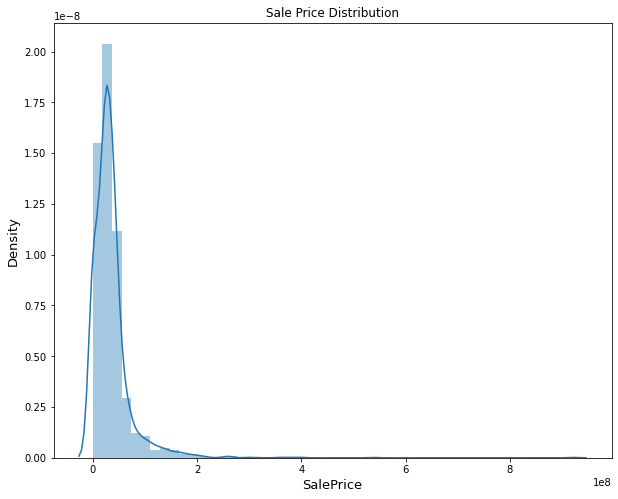

In [497]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title('Sale Price Distribution')
sns.distplot(test_housing_data['house_price'])

plt.ylabel('Density', fontsize=13)
plt.xlabel('SalePrice', fontsize=13)

plt.show()

In [498]:
test_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           2188 non-null   float64
 1   house_price    2188 non-null   float64
 2   amenities      2188 non-null   object 
 3   floors         2188 non-null   float64
 4   bedrooms       2188 non-null   float64
 5   bathrooms      2188 non-null   float64
 6   property_type  2188 non-null   object 
 7   selling_type   2188 non-null   object 
 8   road_size      2188 non-null   float64
 9   road_type      2188 non-null   object 
 10  location_two   2188 non-null   object 
dtypes: float64(6), object(5)
memory usage: 188.2+ KB


In [499]:
test_housing_data.describe()

,area,house_price,floors,bedrooms,bathrooms,road_size
count,2188.000000,2.188000e+03,2188.000000,2188.000000,2188.000000,2188.000000
mean,7.095256,3.457381e+07,2.664077,4.444470,3.585923,15.308044
std,8.964864,4.135992e+07,0.751495,3.187732,2.914013,26.578613
min,1.000000,5.000000e+01,1.000000,1.000000,1.000000,0.000000
25%,4.000000,1.600000e+07,2.500000,2.500000,2.500000,12.000000
50%,4.312500,2.750000e+07,2.500000,4.000000,3.000000,13.000000
75%,6.000000,4.175269e+07,2.500000,5.000000,4.000000,18.000000
max,106.501096,9.200000e+08,8.500000,100.000000,100.000000,1222.000000


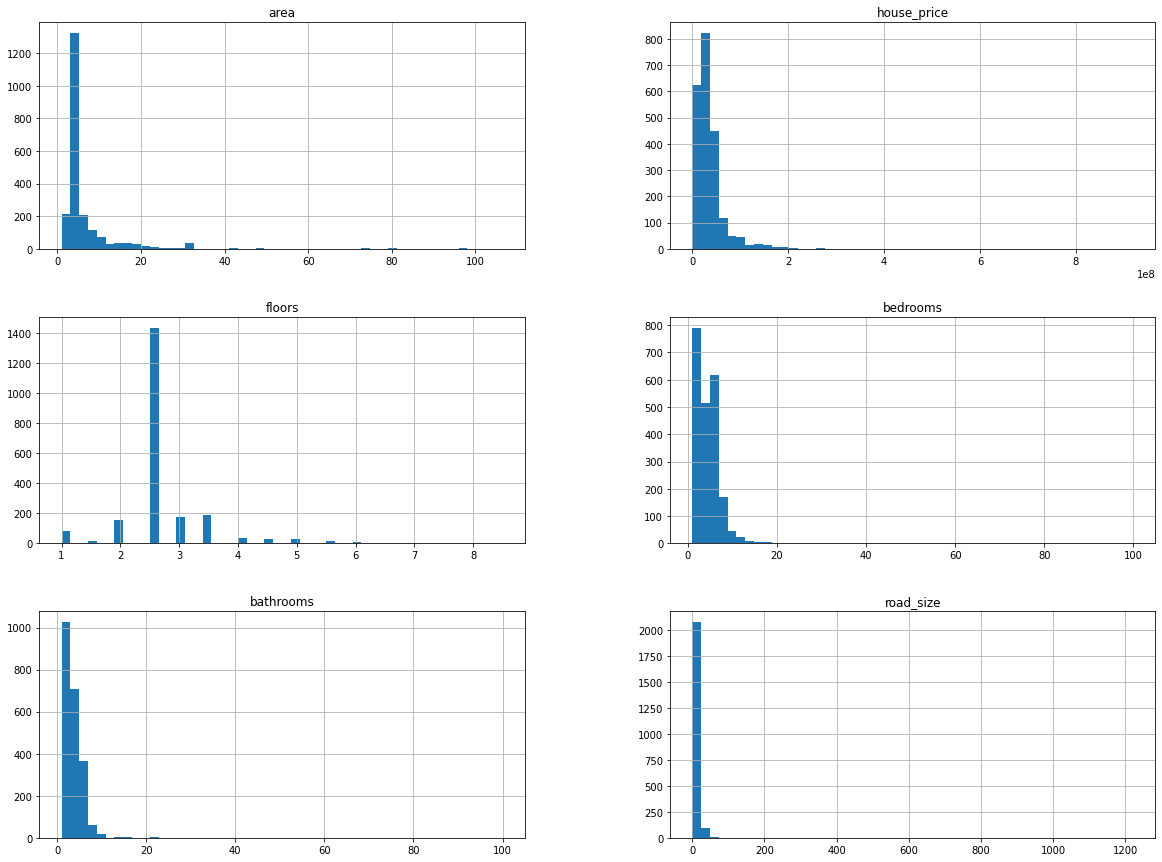

In [500]:
%matplotlib inline
import matplotlib.pyplot as plt
test_housing_data.hist(bins=50, figsize=(20, 15))
plt.show()

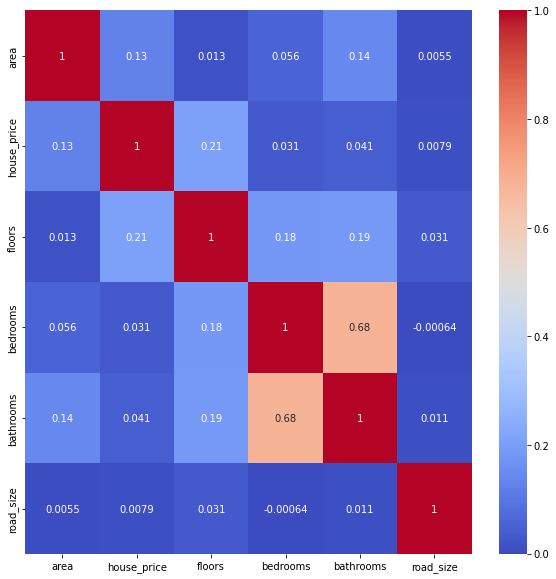

In [501]:
import seaborn as sns

corr_matrix = test_housing_data.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["house_price"])>0]
plt.figure(figsize=(10,10))

g = sns.heatmap(test_housing_data[top_corr_features].corr(),
                annot=True,
                cmap="coolwarm")

In [249]:
y = test_housing_data["house_price"]

In [250]:
test_housing_data.drop("house_price", axis=1, inplace=True)

In [251]:
x = test_housing_data